<a href="https://colab.research.google.com/github/htapiagroup/sistemas-distribuidos-evaluacion-intersemestral-ark150/blob/master/MAC_SistDist_Ex1_LDHJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nombre: Luis Daniel Hernandez Jimenez

Se realizo en conjunto con:

David Cobos

Samuel Baez Herrera

Alexis Martinez Arteaga

Lorrain Eugenio Giddings Soto

Yoselin Aracely Campos Sacramento

Ana Margarita Reyes Hernandez

Aguilar Hernandez Joaquin

Georgina Valenzuela Carrasco

Horacio Tapia McClung

Adquirir los datos.

El conjunto de datos con el que van a trabajar esta disponibles en este enlace y consiste en 12 archivos de texto que tiene informacion del viajes de taxis en la ciudad de NY durante el 2013.

En la red interna de LANIA usando cable la descarga del archivo comprimido desde el enlace tomó entre 5 y 10 minutos. Tomen sus provisiones

El archivo comprimido tiene un tamaño de aproximadamente 4G, el tamaño de archivo mensual oscila entre 2.0 y 2.5G. La base de datos completa es de aproximadamente 30G.

Una vez descargado el archivo pueden descomprimirlo usando la siguiente instruccion
!7z x trip_data.7z -o/content/ sin embargo si intentan descomprimir todos los archivos en su sesion se van a terminar el espacio de disco disponible. 

En esta practica solo van a trabajar con datos correspondientes a los primeros cuatro meses.

In [1]:
# Ejecuta esta celda para activar Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
cd drive

/content/drive


In [2]:
cd My\ Drive/

/content/drive/My Drive


In [3]:
cd 'Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [4]:
cd data

/content/drive/My Drive/Colab Notebooks/data


In [13]:
!wget https://archive.org/download/nycTaxiTripData2013/trip_data.7z

--2019-06-24 21:23:28--  https://archive.org/download/nycTaxiTripData2013/trip_data.7z
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia802501.us.archive.org/1/items/nycTaxiTripData2013/trip_data.7z [following]
--2019-06-24 21:23:28--  https://ia802501.us.archive.org/1/items/nycTaxiTripData2013/trip_data.7z
Resolving ia802501.us.archive.org (ia802501.us.archive.org)... 207.241.228.191
Connecting to ia802501.us.archive.org (ia802501.us.archive.org)|207.241.228.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4102781969 (3.8G) [application/x-7z-compressed]
Saving to: ‘trip_data.7z’

trip_data.7z        100%[===================>]   3.82G  2.68MB/s    in 21m 13s 

2019-06-24 21:44:41 (3.07 MB/s) - ‘trip_data.7z’ saved [4102781969/4102781969]



In [6]:
!7z e trip_data.7z -o/content/drive/My\ Drive/'Colab Notebooks'/data trip_data_1.csv


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 4102781969 bytes (3913 MiB)

Extracting archive: trip_data.7z
--
Path = trip_data.7z
Type = 7z
Physical Size = 4102781969
Headers Size = 433
Method = LZMA:24
Solid = -
Blocks = 12

  0%    
Would you like to replace the existing file:
  Path:     /content/drive/My Drive/Colab Notebooks/data/trip_data_1.csv
  Size:     2459600863 bytes (2346 MiB)
  Modified: 2014-05-12 22:02:53
with the file from archive:
  Path:     trip_data_1.csv
  Size:     2459600863 bytes (2346 MiB)
  Modified: 2014-05-12 22:02:53
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? q

Archives with Errors: 1



Break signaled


In [0]:
!7z x trip_data.7z -o/content/

Crear un DataFrame usando la libreria pandas y responder lo siguiente:

Indicar el tiempo en segundos, que tarda la libreria pandas en leer un archivo a un DataFrame

Cual es la huella de memoria del proceso usado para generar el objeto DataFrame

Cuanta memoria del sistema se usa para crear el objeto anterior

In [0]:
import pandas as pd, time

In [0]:
import psutil, os

In [0]:
#from time import time

In [0]:
def huella_de_memoria():
  '''regresa la memoria usada por un proceso en python'''
  mem= psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [8]:
a = huella_de_memoria()
print('huella de memoria ',a,' mb')

huella de memoria  138.9765625  mb


In [18]:
t_start = time.time()
antesH = huella_de_memoria()
df = pd.read_csv('trip_data_1.csv')
t_end = time.time()
despuesH = huella_de_memoria()
print('memoria al final del proceso', (despuesH-antesH))
print('pd.read_csv(): {} s'.format(t_end-t_start)) # time [s]

memoria al final del proceso 981.82421875
pd.read_csv(): 138.1043062210083 s


In [10]:
b = huella_de_memoria()
print('huella de memoria ',b,' mb')

huella de memoria  4424.1796875  mb


LA cantidad usada para la contruccion del objeto es de 4964.09 gb

Responder las siguientes preguntas:

Cuantas columnas contiene cada archivo de datos descomprimido

Cuantos renglones tiene cada archivo

In [13]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [14]:
df.shape

(14776615, 14)

Identificar si existen renglones con errores en los datos, por ejemplo si hay columnas de mas (o de menos), si hay campos vacios, etc. Si se detectan renglones con errores:

indicar claramente cuantos son los renglones con errores y a que archivos corresponden

crear un nuevo conjunto de datos con los errores eliminados

In [23]:
df['passenger_count'].value_counts()

1    10471701
2     1986196
5      920006
3      597485
6      520066
4      280992
0          80
9           1
Name: passenger_count, dtype: int64

In [16]:
#Aportacion de samuel
df.isnull().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7326207
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          86
dropoff_latitude           86
dtype: int64

In [17]:
#aportacion de samuel
df.isna().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7326207
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude          86
dropoff_latitude           86
dtype: int64

In [0]:
#aportacion de samuel
df=df.dropna(subset=['dropoff_longitude','dropoff_latitude'], how='all')

In [0]:
df = df.drop(df[df.passenger_count > 9].index)

In [19]:
df.shape

(14776529, 14)

In [0]:
#aportacion de Lorrain
del df['store_and_fwd_flag']

In [21]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_time_in_secs', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'],
      dtype='object')

Indicar el tiempo que tarda pandas en obtener el promedio de la distancia de viaje (trip_distance)

In [22]:
%%time
df['trip_distance'].mean()

CPU times: user 31.3 ms, sys: 0 ns, total: 31.3 ms
Wall time: 36 ms


2.7709917978711136

In [0]:
#aportacion Alexis & Samuel
promedio= df['trip_distance']!=0

In [24]:
%%time
promedio.mean()

CPU times: user 29.9 ms, sys: 1.1 ms, total: 31 ms
Wall time: 34.3 ms


0.9943633582690495

punto 6

Todos los pasos siguientes deben realizarse usando la libreria dask

Indicar el tiempo que tarda en obtener el promedio de la distancia de viaje (trip_distance)

Indicar el tiempo que tarda en obtener el promedio de la duracion de viaje (trip_time_in_secs)

Con las columnas pickup_datetime y dropoff_datetime como objetos temporales, crear una nueva columna en los dataframes que se llame duracion y compararla renglon a renglon con la columna trip_time_in_secs

Definir un viaje_largo como aquellos en los que la duracion del viaje (trip_time_in_secs) sea mayor a 20 minutos.

In [0]:
import dask.dataframe as da

In [0]:
dd = da.read_csv('trip_data_1.csv')

In [27]:
%%time
dd['trip_distance'].mean().compute()

CPU times: user 59.7 s, sys: 5.23 s, total: 1min 4s
Wall time: 1min 41s


2.770975670679651

In [28]:
%%time
promediodask= dd['trip_distance']!=0

CPU times: user 2.9 ms, sys: 998 µs, total: 3.9 ms
Wall time: 5.58 ms


In [29]:
%%time
promediodask.mean().compute()

CPU times: user 1min 9s, sys: 15.4 s, total: 1min 25s
Wall time: 1min 1s


0.994357571067528

In [30]:
%%time
dd['trip_time_in_secs'].mean().compute()

CPU times: user 1min 9s, sys: 17.3 s, total: 1min 26s
Wall time: 1min 3s


683.4235930894863

In [0]:
promediodasktiempo= dd['trip_time_in_secs']!=0

In [32]:
%%time
promediodasktiempo.mean().compute()

CPU times: user 1min 9s, sys: 13.3 s, total: 1min 22s
Wall time: 59.7 s


0.9976865472911083

df['tip_fraction']= df['tip_amount']/(df['total_amount']-df['tip_amount'])

df['tpep_dropoff_datetime']= pd.to_datetime(df['tpep_dropoff_datetime'])

In [0]:
df['pickup_datetime']=da.to_datetime(df['pickup_datetime'])

In [0]:
df['dropoff_datetime']=da.to_datetime(df['dropoff_datetime'])

In [0]:
#viajes = da.from_pandas((df['dropoff_datetime']-df['pickup_datetime']), npartitions=1)

In [0]:
viajes=df['dropoff_datetime']-df['pickup_datetime']

In [0]:
nuevo=df.assign(tiempo_viaje=viajes)

In [40]:
nuevo

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,tiempo_viaje
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171,00:06:22
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660,00:04:19
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002,00:04:42
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388,00:04:05
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868,00:09:21
5,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,2013-01-07 15:27:48,2013-01-07 15:38:37,1,648,1.7,-73.966743,40.764252,-73.983322,40.743763,00:10:49
6,496644932DF3932605C22C7926FF0FE0,513189AD756FF14FE670D10B92FAF04C,CMT,1,2013-01-08 11:01:15,2013-01-08 11:08:14,1,418,0.8,-73.995804,40.743977,-74.007416,40.744343,00:06:59
7,0B57B9633A2FECD3D3B1944AFC7471CF,CCD4367B417ED6634D986F573A552A62,CMT,1,2013-01-07 12:39:18,2013-01-07 13:10:56,3,1898,10.7,-73.989937,40.756775,-73.865250,40.770630,00:31:38
8,2C0E91FF20A856C891483ED63589F982,1DA2F6543A62B8ED934771661A9D2FA0,CMT,1,2013-01-07 18:15:47,2013-01-07 18:20:47,1,299,0.8,-73.980072,40.743137,-73.982712,40.735336,00:05:00
9,2D4B95E2FA7B2E85118EC5CA4570FA58,CD2F522EEE1FF5F5A8D8B679E23576B3,CMT,1,2013-01-07 15:33:28,2013-01-07 15:49:26,2,957,2.5,-73.977936,40.786983,-73.952919,40.806370,00:15:58


In [38]:
nuevo.shape

(14776529, 14)

In [39]:
nuevo.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_time_in_secs', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'tiempo_viaje'],
      dtype='object')

In [53]:
type(nuevo)

pandas.core.frame.DataFrame

In [43]:
nuevo.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,tiempo_viaje
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171,00:06:22
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660,00:04:19
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002,00:04:42
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388,00:04:05
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868,00:09:21


In [44]:
nuevo.dtypes

medallion                     object
hack_license                  object
vendor_id                     object
rate_code                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
trip_time_in_secs              int64
trip_distance                float64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
tiempo_viaje         timedelta64[ns]
dtype: object

In [0]:
viajes=nuevo['trip_time_in_secs']


In [0]:
va=viajes.to_frame()

In [0]:
#viajesdl=viajes.apply(madres, axis=1, meta=viajes)
viajesdl=va.trip_time_in_secs.map(lambda trip_time_in_secs: 'y' if trip_time_in_secs>1200 else 'n')

In [43]:
viajesdl

0           n
1           n
2           n
3           n
4           n
5           n
6           n
7           y
8           n
9           n
10          n
11          n
12          n
13          n
14          y
15          n
16          n
17          n
18          n
19          n
20          y
21          n
22          n
23          n
24          n
25          n
26          n
27          n
28          y
29          n
           ..
14776585    n
14776586    n
14776587    n
14776588    n
14776589    n
14776590    n
14776591    n
14776592    n
14776593    y
14776594    n
14776595    n
14776596    n
14776597    n
14776598    n
14776599    n
14776600    n
14776601    n
14776602    n
14776603    n
14776604    n
14776605    y
14776606    n
14776607    n
14776608    y
14776609    n
14776610    n
14776611    n
14776612    n
14776613    n
14776614    n
Name: trip_time_in_secs, Length: 14776529, dtype: object

In [0]:
nuevo=nuevo.assign(Viajes_largos=viajesdl)


In [0]:
nuevo

In [45]:
nuevo['Viajes_largos'].value_counts()

n    13061292
y     1715237
Name: Viajes_largos, dtype: int64

In [0]:
vjt=nuevo['medallion'].value_counts()

In [57]:
vjt

7E1346F23960CC18D7D129FA28B63A75    2137
6FFCF7A4F34BA44239636028E680E438    2112
A979CDA04CFB8BA3D3ACBA7E8D7F0661    2039
D5C7CD37EA4D372D00F0A681CDC93F11    1959
849E486825860106403FB991A763BCC3    1957
6FE6DFF9A59C0B64BE0CA64EE2699F08    1941
06C961EBE7EF4D13F3AE6C005EE0F501    1893
22908753E00888CC219C875C8D5BC4F6    1886
6403BF98E4618E21C795C3B45A636D77    1882
E6101A0F85312C49A5B5950E61D284DC    1882
0310297769C8B049C0EA8E87C697F755    1881
E9FD29C830D1C3D9C06B5D34E959B4B4    1870
FB0E9C6498122E383A2D4E2D13A5D3FF    1869
BC9EE7F807E71ACA2AEA11CAB51604F8    1869
FC229C5E8895E11202ED3AED12366745    1866
B45D01B7B5A22CFA218DEBC41C36C152    1866
E90134322479C5C01D82226C11425CD0    1862
075E4BFE6607421289B566A32BC135E5    1860
0832BDD7A3BE2ECA14DC518FCA8B7E5D    1858
DA1A4CB0E75444C73D1D1633E701206E    1856
4F7C132D3130970CFA892CC858F5ECB5    1855
7755E404335466AECD640879DDFF5E16    1852
B6585890F68EE02702F32DECDEABC2A8    1847
74573167F71AE8239A145571768C49AC    1847
171FD91CBF0D6FAB

In [56]:
type(vjt)

pandas.core.series.Series

In [0]:
#viajesLargos.to_csv('/content/viajesLargos1*.csv')

Hacer una grafica temporal del numero total de pasajeros agregados por dias de la semana y despues por horas del dia. 

Sugerencia: agregar por el correspondiente periodo temporal y graficar. Que pueden observar de las graficas?

In [0]:
este='7E1346F23960CC18D7D129FA28B63A75'

In [0]:
taxi=nuevo[nuevo.medallion==este]

In [0]:
import matplotlib.pyplot as plt

In [0]:
graf=nuevo

In [0]:
graf['hour'] = graf['dropoff_datetime'].dt.hour
graf['weekday'] = graf['dropoff_datetime'].dt.weekday

In [0]:
grafPorHora=graf.groupby('hour')
grafPorDia=graf.groupby('weekday')

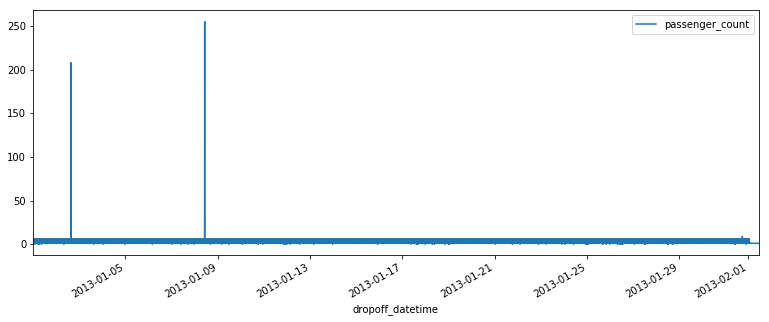

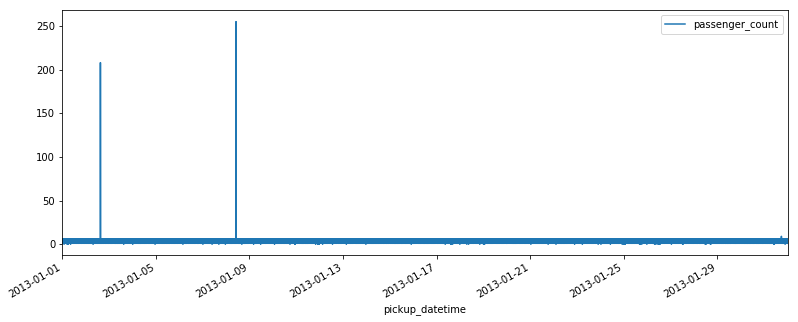

In [51]:
nuevo.plot.line(x='dropoff_datetime', y='passenger_count', figsize=(13,5))
nuevo.plot.line(x='pickup_datetime', y='passenger_count', figsize=(13,5))

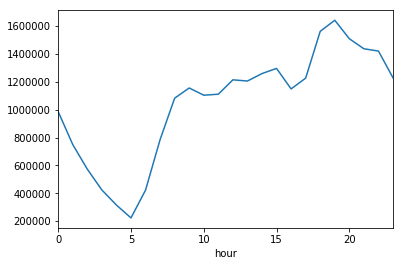

In [52]:
grafPorHora['passenger_count'].sum().plot.line()
#grafPorDia['passenger_count'].sum().plot.line()

In [0]:
taxi.sample(frac=.50)

In [53]:
taxi['hour'] = taxi['dropoff_datetime'].dt.hour
taxi['weekday'] = taxi['dropoff_datetime'].dt.weekday

NameError: ignored

In [0]:
taxiPorHora = taxi.groupby('hour')

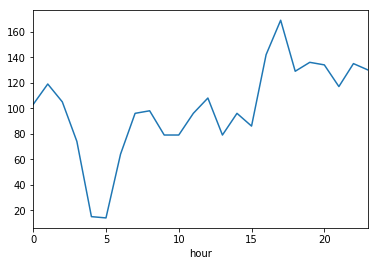

In [103]:
taxiPorHora['passenger_count'].sum().plot.line()

Elegir el vehiculo con mas viajes en cada mes y graficar en un mapa los sitios donde se suben pasajeros agrupados por
dia de la semana (un color distinto para cada dia)
hora del dia (un color distinto para cada intervalo de cuatro horas,00:00 - 03:59, 04:00--07:59, 08:00-11:59, etc.)

Repetir para las posiciones donde se bajan los pasajeros para el mismo vehiculo.

In [0]:
nuevo.dtypes

In [0]:
from bokeh.models import BoxZoomTool
from bokeh.plotting import figure, output_notebook, show

In [0]:
NYC = x_range, y_range = ((-8242000,-8210000), (4965000,4990000))

plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)

    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.add_tools(BoxZoomTool(match_aspect=True))

    return p

options = dict(line_color=None, fill_color='blue', size=5)

In [0]:
from bokeh.tile_providers import STAMEN_TERRAIN
output_notebook()
muestras = taxi.sample(frac=.50)
p= base_plot()
p.add_tile(STAMEN_TERRAIN)
p.circle(x=muestras['dropoff_longitude'], y=muestras['dropoff_latitude'], **options)
show(p)